<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo I: Análisis Exploratorio de Datos (EDA) </font> </center>



### ¿Qué es?

Es cuando revisamos por primera vez los datos que nos llegan, por ejemplo un archivo CSV que nos entregan y deberemos intentar comprender **¿de qué se trata?**, vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

Lo ideal es que tengamos un objetivo que nos hayan *“adjuntado”* con los datos, que indique lo que se quiere conseguir a partir de esos datos. Por ejemplo, nos pasan un excel y nos dicen *“Queremos predecir ventas a 30 días”*, ó *“Clasificar casos malignos/benignos de una enfermedad”*, *“Queremos identificar audiencias que van a realizar re-compra de un producto”*, *“queremos hacer pronóstico de fidelización de clientes/abandonos”*, *“Quiero detectar casos de fraude en mi sistema en tiempo real”*.

### ¿Que hacer cuando llegar un archivo?

- ¿Cuántos registros hay?
    - ¿Son demasiado pocos?
    - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
    
- ¿Están todas las filas completas ó tenemos campos con valores nulos?
    - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
    
- ¿Que datos son discretos y cuales continuos?
    - Muchas veces sirve obtener el tipo de datos: texto, int, double, float
    
- Si es un problema de tipo supervisado:
    - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
    - ¿Esta balanceado el conjunto salida?
    
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?

- ¿Siguen alguna distribución?

- ¿Hay correlación entre features (características)?

- En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.

- ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.

- Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?

- ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
    - Podemos eliminarlos? es importante conservarlos?
    - son errores de carga o son reales?
    
- ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)


## Elementos de un EDA

In [1]:
import pandas as pd
import numpy as np


In [2]:
df_movie = pd.read_csv('../Data/movie_metadata.csv')
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
from CDIN import CDIN as cd

In [5]:
movie = cd(df_movie)

In [6]:
col_movie_cuali, _ =movie.get_cualitativos()

In [7]:
# Las columnas categóricas de este dataframe son:
col_movie_cuali

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [8]:
col_movie_cuanti, _ =movie.get_cuantitativos()

NameError: name 'df' is not defined

## Manejando datos faltantes

In [9]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [10]:
df_movie_drop = df_movie.dropna()
df_movie_drop

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [11]:
df_movie_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [12]:
df_movie['duration'] = df_movie['duration'].fillna(df_movie['duration'].mean())

In [13]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [14]:
df_movie['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [15]:
df_movie['color'] = df_movie['color'].fillna('unknow')
df_movie['color'].unique()

array(['Color', 'unknow', ' Black and White'], dtype=object)

In [16]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Limpieza de los datos

- Eliminar símbolos raros
- Remover dígitos
- Remover espacios en blanco
- Reemplazar texto
- Convertir textos en mínuscula/mayúscula
- Dejar solamente dígitos

In [17]:
import string

In [18]:
dirty_df = pd.read_csv('../Data/dirty_data.csv')

In [19]:
dirty_df

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439
5,25,05/07/1958,CASado,JOSE MANUEL OCHOA CARDENAS,689 24 9939
6,63,01-26-1956,Soltero,JUAN MARIO; OCHOA NAVARRO,306-05-2792
7,59,19xx?10-23,DIVORCIADO,LUIS ONTANEDA MIJARES,99922a45832
8,69,02/12/1954,soltero,EDUARDO OMAR ORTEGA RAMIREZ,NaN
9,59,05/07/1958,NaN,JOSE ALEJANDRO& PRECIADO GANDARA,6439


In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuation(x):
    x = ''.join(ch for ch in x if ch not in string.punctuation)
    return x

In [22]:
palabra = 'Ho,la!'

In [23]:
remove_punctuation(palabra)

'Hola'

In [24]:
remove_punctuation('VICTOR ramos _ _ _')

'VICTOR ramos   '

In [25]:
remove_punctuation(2558)

TypeError: 'int' object is not iterable

In [26]:
for ch in x:
    if ch not in string.punctuation:
        x=x+ch

NameError: name 'x' is not defined

In [27]:
#Método para remover símbolos de puntuación
def remove_punctuation(x):
    try:
        x = ''.join(ch for ch in x if ch not in string.punctuation)
    except:
        print(f'{x} no es un string, no se puede remover símbolos de puntuación')
        pass
    return x

In [28]:
remove_punctuation('VICTOR ramos _ _ _')

'VICTOR ramos   '

In [29]:
remove_punctuation(2558)

2558 no es un string, no se puede remover símbolos de puntuación


2558

In [30]:
string.digits

'0123456789'

In [31]:
#Método para remover dígitos en una cadena de caracteres
def remove_digits(x):
    try:
        x = ''.join(ch for ch in x if ch not in string.digits)
    except:
        pass
    return x

In [32]:
palabra = 'edu6ardo Castillo'
remove_digits(palabra)

'eduardo Castillo'

In [33]:
remove_digits(2878)

2878

In [34]:
'Hola mundo, cómo están?'.split()

['Hola', 'mundo,', 'cómo', 'están?']

In [35]:
#Método para remover espacios en blanco
def remove_whitespace(x):
    try:
        x=''.join(x.split())
    except:
        pass
    return x

In [36]:
remove_whitespace('Hola mundo, cómo están?')

'Holamundo,cómoestán?'

In [37]:
#Método para reemplazar texto
def replace_text(x, to_replace, replacement):
    try:
        x=x.replace(to_replace, replacement)
    except:
        pass
    return x
    

In [38]:
#Método para convertir una cadenada de caracteres en mayúsculas
def uppercase_text(x):
    try:
        x=x.upper()
    except:
        pass
    return x

In [39]:
#Método para convertir una cadenada de caracteres en minúsculas
def lowercase_text(x):
    try:
        x=x.lowe()
    except:
        pass
    return x

In [40]:
dirty_df['people'].apply(uppercase_text).apply(remove_punctuation).apply(remove_digits)

0                      ALFONSO AGUILAR
1                     EDUARDO CASTILLO
2                        JOCELYN MEDEL
3                      VICTOR RAMOS   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    JOSE AANTONIO QUINTERO RODRIGUEZ
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  ARTURO RUIZ CHAVEZ
Name: people, dtype: object

In [41]:
import pandas as pd
import numpy as np
import string

class CDIN:
    def __init__(self,df):
        self.df=df
        self.col_binarios=None
        self.col_cuantitativos=None
        self.col_cualitativos=None
   
    # Métodos para obtener la clasificación de los datos en un dataframe 
    def get_binarios(self):
        col = self.df.columns
        col_binarias = []
        for c in col:
            if self.df[c].nunique()==2:
                col_binarias.append(c)
        
        self.col_binarios = col_binarias
        return self.col_binarios, self.df[self.col_binarios]
        
    def get_cualitativos(self):
        df_cuali = self.df.select_dtypes(include=['object']).copy()
        self.col_cualitativos = df_cuali.columns
        # No se hace distinción entre cat nominales y ordinales
        
        return self.col_cualitativos, df_cuali
    
    def get_cuantitativos(self):
        df_cuanti = df.select_dtypes(include=['number']).copy()
        self.col_cuantitativos = df_cuanti.columns
        return self.col_cuantitativos, df_cuanti
    
    ## Métodos estáticos para limpieza del dataframe
    @staticmethod
    def remove_punctuation(x):
        try:
            x = ''.join(ch for ch in x if ch not in string.punctuation)
        except:
            print(f'{x} no es un string, no se puede remover símbolos de puntuación')
            pass
        return x
       
    @staticmethod
    #Método para remover dígitos en una cadena de caracteres
    def remove_digits(x):
        try:
            x = ''.join(ch for ch in x if ch not in string.digits)
        except:
            pass
        return x
    @staticmethod
    #Método para remover espacios en blanco
    def remove_whitespace(x):
        try:
            x=''.join(x.split())
        except:
            pass
        return x
    @staticmethod
    #Método para reemplazar texto
    def replace_text(x, to_replace, replacement):
        try:
            x=x.replace(to_replace, replacement)
        except:
            pass
        return x
    @staticmethod
    #Método para convertir una cadenada de caracteres en mayúsculas
    def uppercase_text(x):
        try:
            x=x.upper()
        except:
            pass
        return x
    
    #Método para convertir una cadenada de caracteres en minúsculas
    @staticmethod
    def lowercase_text(x):
        try:
            x=x.lower()
        except:
            pass
        return x

In [42]:
cdin_dirty = CDIN(dirty_df)

In [43]:
cdin_dirty.df['people'].apply(cdin_dirty.uppercase_text).apply(cdin_dirty.remove_digits)

0                     ALFONSO A,GUILAR
1                     EDUARDO CASTILLO
2                        JOCELYN MEDEL
3                   VICTOR RAMOS _ _ _
4       CARLOS EDUARDO; OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6            JUAN MARIO; OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9     JOSE ALEJANDRO& PRECIADO GANDARA
10    JOSE AANTONIO QUINTERO RODRIGUEZ
11             JOSE ALFONSO RAMIREZ D.
12             ANA PAULA RANGEL OCHOA&
13                  ARTURO RUIZ CHAVEZ
Name: people, dtype: object

In [44]:
from CDIN import CDIN as acd

In [45]:
acd.remove_whitespace('sdjdsjd jsjdsjsd sdjdsjds')

'sdjdsjdjsjdsjsdsdjdsjds'

In [46]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         14 non-null     int64 
 1   birth_date  14 non-null     object
 2   marital     13 non-null     object
 3   people      14 non-null     object
 4   ssn         13 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


## Reporte de Calidad de Datos

In [47]:
def dqr(data):
    #%% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values), columns=['Nombre columnas'], index=list(data.columns.values))
    
    #%% Lista de tipos de datos del dataframe
    data_dtypes = pd.DataFrame(data.dtypes, columns=['Tipo de datos'])
    
    #%% Lista de valores perdidos del dataframe (valores faltante 'nan')
    missing_values = pd.DataFrame(data.isnull().sum(), columns=['valores faltantes'])
    
    #%% Lista de valores unicos de cada columns
    unique_values = pd.DataFrame(columns=['valores unicos'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]
        
    #%% Lista de valores unicos de cada columna
    lista_unique_values = pd.DataFrame(columns=['lista valores unicos'])
    for col in list(data.columns.values):
        lista_unique_values.loc[col] = [data[col].unique()]
            
    #%% Lista de valores presentes
    present_values = pd.DataFrame(data.count(), columns=['Valores presentes'])
    
    #%% Información estadística
    #%%Lista de valores máximos
    max_values = pd.DataFrame(columns=['Valores Max'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            pass
        
    #%%Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Valores Min'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            pass
        
    #%% Lista de valores con su media
    #%% Lista de valores con su desviación estándar
    
    
    return columns.join(data_dtypes).join(missing_values).join(present_values).join(unique_values).join(lista_unique_values).join(max_values).join(min_values)

In [48]:
dqr(dirty_df)

,Nombre columnas,Tipo de datos,valores faltantes,Valores presentes,valores unicos,lista valores unicos,Valores Max,Valores Min
age,age,int64,0,14,11,"[24, 35, 46, 57, 10, 25, 63, 59, 69, 20, 30]",69,10
birth_date,birth_date,object,0,14,6,"[02/12/1954, 05/07/1958, 01-26-1956, 19xx-10-2...",19xx?10-23,01-26-1956
marital,marital,object,1,13,8,"[soltero, casado, Soltero, divorciado, SOLTERO...",NaN,NaN
people,people,object,0,14,14,"[Alfonso A,guilar, edu6ardo Castillo, jocelyn ...",jocelyn medel,ANA PAULA RANGEL OCHOA&
ssn,ssn,object,1,13,8,"[6439, 689 24 9939, 306-05-2792, 99922a45832, ...",NaN,NaN


In [49]:
"    Gaddiel Desirena    "

'    Gaddiel Desirena    '

In [50]:
def remove_left_rigth_white_space(x):
    
    return x

In [51]:
"Gaddiel Desirena"

'Gaddiel Desirena'

In [52]:
"GaddielDesirena"

'GaddielDesirena'

In [53]:
dirty_df['ssn']

0            6439
1     689 24 9939
2     306-05-2792
3     99922a45832
4            6439
5     689 24 9939
6     306-05-2792
7     99922a45832
8             NaN
9            6439
10    689 24 9938
11    306-06-2792
12    99922a45845
13        missing
Name: ssn, dtype: object

In [54]:
'6587'+'000000'

'6587000000'

In [55]:
dirty_df['marital'].unique()

array(['soltero', 'casado', 'Soltero', 'divorciado', 'SOLTERO', 'CASado',
       'DIVORCIADO', nan, 'missing'], dtype=object)

### Actividad 

1.- Crear una función que quite los espacios en blando de la izquierda y la derecha, añadirlo a la clase CDIN y probarlo con el dataset dirty_data.csv.

2.- Limpiar la columna 'people', quitar signos de puntuación, números, dejar en minúsculas y eliminar espacios de la derecha e izquierda de cada campo.

3.- limpiar la columns ssn, dejar sólo dígitos, si el número de dígitos son menores a 10, rellenarlos con ceros a la derecha

4.- limpiar columna marital, las categorías deben ser las siguientes, si es soltero entonces renombrar el valor con 'S', si es 
casado con 'C', y si es divorciado entonces con 'D', missing 'm'

5.- crear un reporte de calidad de datos utilizando el método dqr(), añada esta función en la clase CDIN, importar la clase y utilizar la función para generar el reporte de calidad de datos.


In [56]:
help('kskds'.strip)

Help on built-in function strip:

strip(chars=None, /) method of builtins.str instance
    Return a copy of the string with leading and trailing whitespace removed.
    
    If chars is given and not None, remove characters in chars instead.



In [57]:
' sdkdskds ksksdksd '.strip()

'sdkdskds ksksdksd'

In [58]:
def remove_left_rigth_white_space(x):
    try:
        x = x.strip()
    except:
        pass
    return x

In [59]:
remove_left_rigth_white_space(' 2. 2 ')

'2. 2'

## EDA utilizando el reporte de calidad de datos

In [61]:
# Dataset de paises
df_countries = pd.read_csv('../Data/countries.csv', sep=';')
df_countries.head(10)


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,NaN,AL,783754,"sq,el",Albania,"MK,GR,ME,RS,XK",8,355,2986952,NaN,NaN,.al
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,NaN,AM,174982,hy,Armenia,"GE,IR,AZ,TR",51,374,2968000,######,^(\d{6})$,.am
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,NaN,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,NaN,NaN,.ao
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,NaN,AY,6697173,NaN,Antarctica,NaN,10,NaN,0,NaN,NaN,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar


In [62]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [63]:
from CDIN import CDIN as cd

In [64]:
cd_countries = CDIN(df_countries)

In [66]:
col_cat, df_countires_cat = cd_countries.get_cualitativos()

In [67]:
df_countires_cat.head()

,alpha_2,alpha_3,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,languages,name,neighbours,phone,postal_code_format,postal_code_regex,tld
0,AD,AND,Andorra la Vella,EU,EUR,Euro,NaN,AN,ca,Andorra,"ES,FR",376,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,Abu Dhabi,AS,AED,Dirham,NaN,AE,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",971,NaN,NaN,.ae
2,AF,AFG,Kabul,AS,AFN,Afghani,NaN,AF,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",93,NaN,NaN,.af
3,AG,ATG,St. John's,NaN,XCD,Dollar,NaN,AC,en-AG,Antigua and Barbuda,NaN,+1-268,NaN,NaN,.ag
4,AI,AIA,The Valley,NaN,XCD,Dollar,NaN,AV,en-AI,Anguilla,NaN,+1-264,NaN,NaN,.ai


In [69]:
# Obtener el reporte de calidad de datos
reporte_countries = cd.dqr(df_countries)

In [70]:
reporte_countries

,Nombre columnas,Tipo de datos,valores faltantes,Valores presentes,valores unicos,lista valores unicos,Valores Max,Valores Min
alpha_2,alpha_2,object,1,251,251,"[AD, AE, AF, AG, AI, AL, AM, AO, AQ, AR, AS, A...",NaN,NaN
alpha_3,alpha_3,object,0,252,252,"[AND, ARE, AFG, ATG, AIA, ALB, ARM, AGO, ATA, ...",ZWE,ABW
area,area,float64,0,252,248,"[468.0, 82880.0, 647500.0, 443.0, 102.0, 28748...",17100000.0,0.0
capital,capital,object,6,246,244,"[Andorra la Vella, Abu Dhabi, Kabul, St. John'...",NaN,NaN
continent,continent,object,42,210,6,"[EU, AS, nan, AF, AN, SA, OC]",NaN,NaN
currency_code,currency_code,object,1,251,155,"[EUR, AED, AFN, XCD, ALL, AMD, AOA, nan, ARS, ...",NaN,NaN
currency_name,currency_name,object,1,251,82,"[Euro, Dirham, Afghani, Dollar, Lek, Dram, Kwa...",NaN,NaN
eqivalent_fips_code,eqivalent_fips_code,object,251,1,1,"[nan, FI]",NaN,NaN
fips,fips,object,3,249,249,"[AN, AE, AF, AC, AV, AL, AM, AO, AY, AR, AQ, A...",NaN,NaN
geoname_id,geoname_id,int64,0,252,252,"[3041565, 290557, 1149361, 3576396, 3573511, 7...",8505033,49518


In [72]:
reporte_countries.loc['alpha_3','lista valores unicos']

array(['AND', 'ARE', 'AFG', 'ATG', 'AIA', 'ALB', 'ARM', 'AGO', 'ATA',
       'ARG', 'ASM', 'AUT', 'AUS', 'ABW', 'ALA', 'AZE', 'BIH', 'BRB',
       'BGD', 'BEL', 'BFA', 'BGR', 'BHR', 'BDI', 'BEN', 'BLM', 'BMU',
       'BRN', 'BOL', 'BES', 'BRA', 'BHS', 'BTN', 'BVT', 'BWA', 'BLR',
       'BLZ', 'CAN', 'CCK', 'COD', 'CAF', 'COG', 'CHE', 'CIV', 'COK',
       'CHL', 'CMR', 'CHN', 'COL', 'CRI', 'CUB', 'CPV', 'CUW', 'CXR',
       'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DMA', 'DOM', 'DZA', 'ECU',
       'EST', 'EGY', 'ESH', 'ERI', 'ESP', 'ETH', 'FIN', 'FJI', 'FLK',
       'FSM', 'FRO', 'FRA', 'GAB', 'GBR', 'GRD', 'GEO', 'GUF', 'GGY',
       'GHA', 'GIB', 'GRL', 'GMB', 'GIN', 'GLP', 'GNQ', 'GRC', 'SGS',
       'GTM', 'GUM', 'GNB', 'GUY', 'HKG', 'HMD', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IRL', 'ISR', 'IMN', 'IND', 'IOT', 'IRQ', 'IRN',
       'ISL', 'ITA', 'JEY', 'JAM', 'JOR', 'JPN', 'KEN', 'KGZ', 'KHM',
       'KIR', 'COM', 'KNA', 'PRK', 'KOR', 'XKX', 'KWT', 'CYM', 'KAZ',
       'LAO', 'LBN',

### Haciendo preprocesamiento del dataframe

In [74]:
df_countries.shape[0]

252

In [76]:
100*reporte_countries['Valores presentes']/df_countries.shape[0] > 65

alpha_2                 True
alpha_3                 True
area                    True
capital                 True
continent               True
currency_code           True
currency_name           True
eqivalent_fips_code    False
fips                    True
geoname_id              True
languages               True
name                    True
neighbours              True
numeric                 True
phone                   True
population              True
postal_code_format     False
postal_code_regex      False
tld                     True
Name: Valores presentes, dtype: bool

In [78]:
#dqr de Columnas que contienen al menos el 65% de valores presentes
reporte_countries_65 = reporte_countries[100*reporte_countries['Valores presentes']/df_countries.shape[0] > 65]
reporte_countries_65

,Nombre columnas,Tipo de datos,valores faltantes,Valores presentes,valores unicos,lista valores unicos,Valores Max,Valores Min
alpha_2,alpha_2,object,1,251,251,"[AD, AE, AF, AG, AI, AL, AM, AO, AQ, AR, AS, A...",NaN,NaN
alpha_3,alpha_3,object,0,252,252,"[AND, ARE, AFG, ATG, AIA, ALB, ARM, AGO, ATA, ...",ZWE,ABW
area,area,float64,0,252,248,"[468.0, 82880.0, 647500.0, 443.0, 102.0, 28748...",17100000.0,0.0
capital,capital,object,6,246,244,"[Andorra la Vella, Abu Dhabi, Kabul, St. John'...",NaN,NaN
continent,continent,object,42,210,6,"[EU, AS, nan, AF, AN, SA, OC]",NaN,NaN
currency_code,currency_code,object,1,251,155,"[EUR, AED, AFN, XCD, ALL, AMD, AOA, nan, ARS, ...",NaN,NaN
currency_name,currency_name,object,1,251,82,"[Euro, Dirham, Afghani, Dollar, Lek, Dram, Kwa...",NaN,NaN
fips,fips,object,3,249,249,"[AN, AE, AF, AC, AV, AL, AM, AO, AY, AR, AQ, A...",NaN,NaN
geoname_id,geoname_id,int64,0,252,252,"[3041565, 290557, 1149361, 3576396, 3573511, 7...",8505033,49518
languages,languages,object,3,249,246,"[ca, ar-AE,fa,en,hi,ur, fa-AF,ps,uz-AF,tk, en-...",NaN,NaN


In [81]:
col_countries_65=reporte_countries_65['Nombre columnas'].to_list()

In [82]:
#Filtrado del dataframe original con las columnas que cumplen al menos el 65% de datos presentes
df_countries_65 = df_countries[col_countries_65]
df_countries_65.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,.ai


In [83]:
df_countries_65.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   alpha_2        251 non-null    object 
 1   alpha_3        252 non-null    object 
 2   area           252 non-null    float64
 3   capital        246 non-null    object 
 4   continent      210 non-null    object 
 5   currency_code  251 non-null    object 
 6   currency_name  251 non-null    object 
 7   fips           249 non-null    object 
 8   geoname_id     252 non-null    int64  
 9   languages      249 non-null    object 
 10  name           252 non-null    object 
 11  neighbours     165 non-null    object 
 12  numeric        252 non-null    int64  
 13  phone          247 non-null    object 
 14  population     252 non-null    int64  
 15  tld            250 non-null    object 
dtypes: float64(1), int64(3), object(12)
memory usage: 31.6+ KB


In [84]:
#¿Cuáles son los continentes que se tienen representados en el dataframe?
df_countries_65['continent'].unique()

array(['EU', 'AS', nan, 'AF', 'AN', 'SA', 'OC'], dtype=object)

In [85]:
df_countries_65['continent'].fillna('Unkw', inplace=True) #rellenando los valores nan por una etiqueta que represnte elementos desconocidos

C:\Users\uie70742\AppData\Local\Temp/ipykernel_21156/822927553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_65['continent'].fillna('Unkw', inplace=True) #rellenando los valores nan por una etiqueta que represnte elementos desconocidos


In [87]:
df_countries_65['continent'].unique(), df_countries_65['continent'].nunique()

(array(['EU', 'AS', 'Unkw', 'AF', 'AN', 'SA', 'OC'], dtype=object), 7)

In [88]:
#¿Cuántos países se tienen en cada continente represntado en el dataframe?
df_countries_65['continent'].value_counts()

AF      58
EU      54
AS      52
Unkw    42
OC      27
SA      14
AN       5
Name: continent, dtype: int64

In [89]:
#¿Cuáles son los países que tienen frontera con Mexico?
df_countries_65[df_countries_65['alpha_3']=='MEX']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
157,MX,MEX,1972550.0,Mexico City,Unkw,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,.mx


In [96]:
paises_frontera_mex = df_countries_65[df_countries_65['alpha_3']=='MEX']['neighbours'].to_list()[0].split(',')
paises_frontera_mex

['GT', 'US', 'BZ']

In [98]:
df_countries_65[df_countries_65['alpha_2']=='GT']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
90,GT,GTM,108890.0,Guatemala City,Unkw,GTQ,Quetzal,GT,3595528,es-GT,Guatemala,"MX,HN,BZ,SV",320,502,13550440,.gt


In [99]:
df_countries_65[df_countries_65['alpha_2']=='US']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
233,US,USA,9629091.0,Washington,Unkw,USD,Dollar,US,6252001,"en-US,es-US,haw,fr",United States,"CA,MX,CU",840,1,310232863,.us


In [100]:
df_countries_65[df_countries_65['alpha_2']=='BZ']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
36,BZ,BLZ,22966.0,Belmopan,Unkw,BZD,Dollar,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,.bz


In [102]:
#¿Cuáles son los paises que hablan español?
df_countries_65['languages'].str.contains('es')

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251     True
Name: languages, Length: 252, dtype: object

In [105]:
#Limpieza de valores faltantes
df_countries_65['languages'].fillna('unkw', inplace=True)

C:\Users\uie70742\AppData\Local\Temp/ipykernel_21156/400671461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_65['languages'].fillna('unkw', inplace=True)


In [106]:
df_countries_65['languages'].unique()

array(['ca', 'ar-AE,fa,en,hi,ur', 'fa-AF,ps,uz-AF,tk', 'en-AG', 'en-AI',
       'sq,el', 'hy', 'pt-AO', 'unkw', 'es-AR,en,it,de,fr,gn',
       'en-AS,sm,to', 'de-AT,hr,hu,sl', 'en-AU', 'nl-AW,es,en', 'sv-AX',
       'az,ru,hy', 'bs,hr-BA,sr-BA', 'en-BB', 'bn-BD,en',
       'nl-BE,fr-BE,de-BE', 'fr-BF', 'bg,tr-BG,rom', 'ar-BH,en,fa,ur',
       'fr-BI,rn', 'fr-BJ', 'fr', 'en-BM,pt', 'ms-BN,en-BN',
       'es-BO,qu,ay', 'nl,pap,en', 'pt-BR,es,en,fr', 'en-BS', 'dz',
       'en-BW,tn-BW', 'be,ru', 'en-BZ,es', 'en-CA,fr-CA,iu', 'ms-CC,en',
       'fr-CD,ln,kg', 'fr-CF,sg,ln,kg', 'fr-CG,kg,ln-CG',
       'de-CH,fr-CH,it-CH,rm', 'fr-CI', 'en-CK,mi', 'es-CL',
       'en-CM,fr-CM', 'zh-CN,yue,wuu,dta,ug,za', 'es-CO', 'es-CR,en',
       'es-CU', 'pt-CV', 'nl,pap', 'en,zh,ms-CC', 'el-CY,tr-CY,en',
       'cs,sk', 'de', 'fr-DJ,ar,so-DJ,aa', 'da-DK,en,fo,de-DK', 'en-DM',
       'es-DO', 'ar-DZ', 'es-EC', 'et,ru', 'ar-EG,en,fr', 'ar,mey',
       'aa-ER,ar,tig,kun,ti-ER', 'es-ES,ca,gl,eu,oc',
       '

In [109]:
df_countries_65_esp=df_countries_65[df_countries_65['languages'].str.contains('es')] #Los países que hablan español
df_countries_65_esp.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,.ar
13,AW,ABW,193.0,Oranjestad,Unkw,AWG,Guilder,AA,3577279,"nl-AW,es,en",Aruba,NaN,533,297,71566,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,.br
36,BZ,BLZ,22966.0,Belmopan,Unkw,BZD,Dollar,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,.bz


In [110]:
df_countries_65_esp.shape[0]

29

In [114]:
#¿Cuáles son los 10 primeros países que hablan español con mayor población?
df_countries65_esmayorpob = df_countries_65_esp.sort_values(by='population', ascending=False).head(10)
df_countries65_esmayorpob

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
233,US,USA,9629091.0,Washington,Unkw,USD,Dollar,US,6252001,"en-US,es-US,haw,fr",United States,"CA,MX,CU",840,1,310232863,.us
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,.br
157,MX,MEX,1972550.0,Mexico City,Unkw,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,.mx
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,.co
67,ES,ESP,504782.0,Madrid,EU,EUR,Euro,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,.es
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,.ar
174,PE,PER,1285220.0,Lima,SA,PEN,Sol,PE,3932488,"es-PE,qu,ay",Peru,"EC,CL,BO,BR,CO",604,51,29907003,.pe
238,VE,VEN,912050.0,Caracas,SA,VEF,Bolivar,VE,3625428,es-VE,Venezuela,"GY,BR,CO",862,58,27223228,.ve
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,.cl
62,EC,ECU,283560.0,Quito,SA,USD,Dollar,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,.ec


<AxesSubplot:xlabel='alpha_3'>

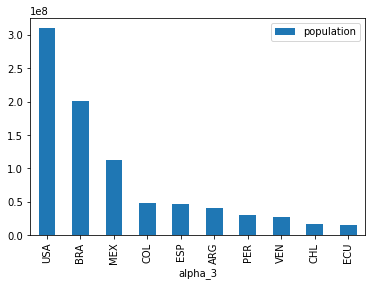

In [115]:
df_countries65_esmayorpob.set_index('alpha_3')[['population']].plot(kind='bar')

In [116]:
#¿Cuáles son los 10 primeros países que hablan español con mayor superficie?
df_countries65_esmayorarea = df_countries_65_esp.sort_values(by='area', ascending=False).head(10)
df_countries65_esmayorarea

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
233,US,USA,9629091.0,Washington,Unkw,USD,Dollar,US,6252001,"en-US,es-US,haw,fr",United States,"CA,MX,CU",840,1,310232863,.us
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,.br
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,.ar
157,MX,MEX,1972550.0,Mexico City,Unkw,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,.mx
174,PE,PER,1285220.0,Lima,SA,PEN,Sol,PE,3932488,"es-PE,qu,ay",Peru,"EC,CL,BO,BR,CO",604,51,29907003,.pe
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,.co
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,.bo
238,VE,VEN,912050.0,Caracas,SA,VEF,Bolivar,VE,3625428,es-VE,Venezuela,"GY,BR,CO",862,58,27223228,.ve
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,.cl
67,ES,ESP,504782.0,Madrid,EU,EUR,Euro,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,.es


<AxesSubplot:xlabel='alpha_3'>

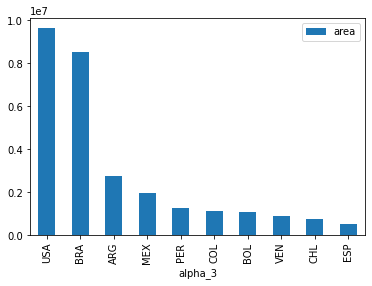

In [117]:
df_countries65_esmayorarea.set_index('alpha_3')[['area']].plot(kind='bar')

In [124]:
#¿Cuáles son los 10 países con mayor superficie?
df_countries_65_mayor_area = df_countries_65.sort_values(by='area', ascending=False).head(10)
df_countries_65_mayor_area

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,tld
191,RU,RUS,17100000.0,Moscow,EU,RUB,Ruble,RS,2017370,"ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua...",Russia,"GE,CN,BY,UA,KZ,LV,PL,EE,LT,FI,MN,NO,AZ,KP",643,7,140702000,.ru
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,AY,6697173,unkw,Antarctica,NaN,10,NaN,0,.aq
37,CA,CAN,9984670.0,Ottawa,Unkw,CAD,Dollar,CA,6251999,"en-CA,fr-CA,iu",Canada,US,124,1,33679000,.ca
233,US,USA,9629091.0,Washington,Unkw,USD,Dollar,US,6252001,"en-US,es-US,haw,fr",United States,"CA,MX,CU",840,1,310232863,.us
47,CN,CHN,9596960.0,Beijing,AS,CNY,Yuan Renminbi,CH,1814991,"zh-CN,yue,wuu,dta,ug,za",China,"LA,BT,TJ,KZ,MN,AF,NP,MM,KG,PK,KP,RU,VN,IN",156,86,1330044000,.cn
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,.br
12,AU,AUS,7686850.0,Canberra,OC,AUD,Dollar,AS,2077456,en-AU,Australia,NaN,36,61,21515754,.au
104,IN,IND,3287590.0,New Delhi,AS,INR,Rupee,IN,1269750,"en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,s...",India,"CN,NP,MM,BT,PK,BD",356,91,1173108018,.in
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,.ar
125,KZ,KAZ,2717300.0,Astana,AS,KZT,Tenge,KZ,1522867,"kk,ru",Kazakhstan,"TM,CN,KG,UZ,RU",398,7,15340000,.kz


<AxesSubplot:xlabel='alpha_3'>

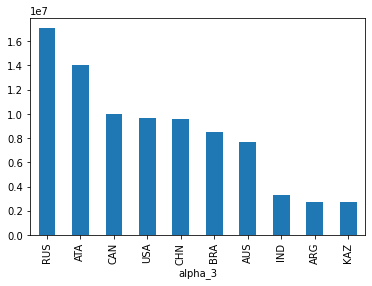

In [125]:
df_countries_65_mayor_area.set_index('alpha_3')['area'].plot(kind='bar')